<a href="https://colab.research.google.com/github/vitorbeltrao/VB_data_science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*by [Vitor Beltrão](https://www.linkedin.com/in/v%C3%ADtor-beltr%C3%A3o-56a912178/)*

---

# Detecção de Fraudes em Cartões de Crédito

No Brasil, as compras pela web estão cada vez mais comuns. O e-commerce nacional cresceu exponencialmente, e como consequência disso, houve um grande aumento de transações online.

Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<center><img width="30%" src="https://i.pinimg.com/564x/bf/b8/cf/bfb8cf7605594f7b78b336151afe0840.jpg"></center>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

**Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.**

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<center><img width="30%" src="https://img.freepik.com/free-vector/set-secure-credit-cards-with-chips_98292-4517.jpg"></center>


[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [31]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

Importar os dados para um DataFrame.

In [32]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Nesta etapa, vamos abordar os tópicos descritos abaixo:

* Ver as 5 primeiras entradas;
* Ver o resumo estatístico do dataframe;
* Verificar se há valores ausentes;
* Plotar um gráfico de barras para ver o balanceamento do *dataset*;
* Plotar os seguintes histogramas:
    * Variável `Time`;
    * Variável `Amount`;
* Plotar um `boxplot` para a variável `Amount`;
* Plotar uma matriz de correlação.

In [33]:
#Ver as 05 primeiras entradas do DF
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
#Ver o resumo estatístico do DF
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [35]:
#Ver os valores ausentes
df.isnull().sum

<bound method DataFrame.sum of          Time     V1     V2     V3     V4  ...    V26    V27    V28  Amount  Class
0       False  False  False  False  False  ...  False  False  False   False  False
1       False  False  False  False  False  ...  False  False  False   False  False
2       False  False  False  False  False  ...  False  False  False   False  False
3       False  False  False  False  False  ...  False  False  False   False  False
4       False  False  False  False  False  ...  False  False  False   False  False
...       ...    ...    ...    ...    ...  ...    ...    ...    ...     ...    ...
284802  False  False  False  False  False  ...  False  False  False   False  False
284803  False  False  False  False  False  ...  False  False  False   False  False
284804  False  False  False  False  False  ...  False  False  False   False  False
284805  False  False  False  False  False  ...  False  False  False   False  False
284806  False  False  False  False  False  ...  False  F

In [36]:
#Ver a porcentagem de valores ausentes
df.isnull().sum()/df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Podemos ver que esse DataFrame não possui nenhuma variável com valor ausente.

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

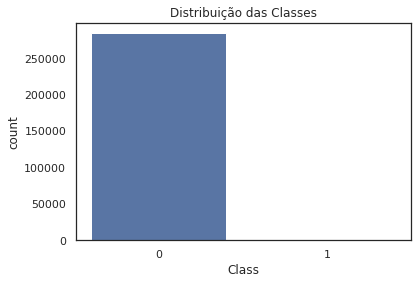

In [37]:
#Balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))
#Plotar gráfico de barras para as classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()


Neste gráfico de barras, podemos ver que o DataSet está muito desbalanceado.

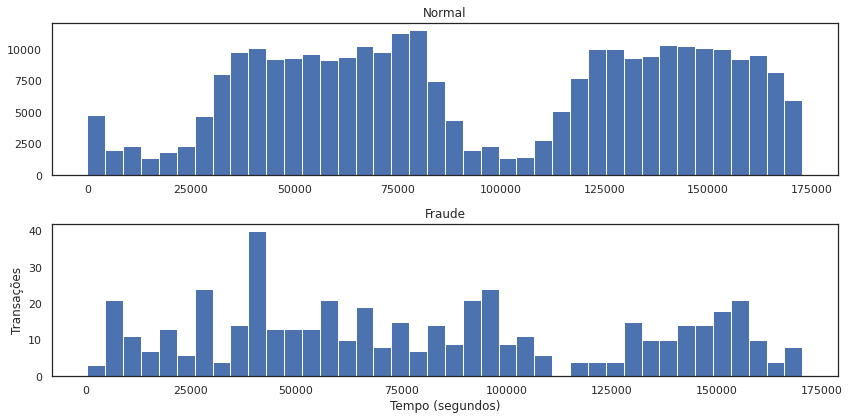

In [38]:
#Plotar histogramas
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraude')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

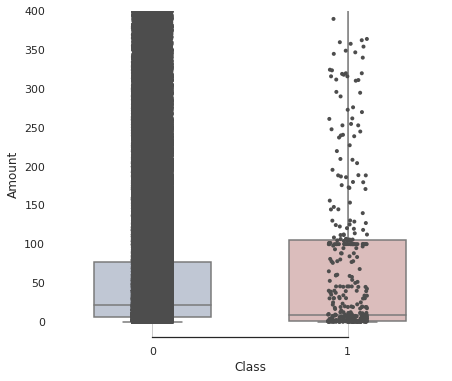

In [39]:
#Plotar boxplot para as fraudes
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="Class", y="Amount", data=df,whis=[0, 100], width=.6, palette="vlag")
plt.ylim((-20, 400))
sns.stripplot(x="Class", y="Amount", data=df,size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="Amount")
sns.despine(trim=True, left=True)



In [40]:
#Conferindo os valores do Boxplot
df[(df.Class == 1) & (df.Amount < 400)]['Amount'].describe()

count    450.000000
mean      57.170911
std       90.700972
min        0.000000
25%        1.000000
50%        6.090000
75%       99.990000
max      390.000000
Name: Amount, dtype: float64

Com o gráfico bloxplot e com os valores expostos nesse último comando, podemos ver que os valores dos primeiros 75% estão coerentes com o gráfico.

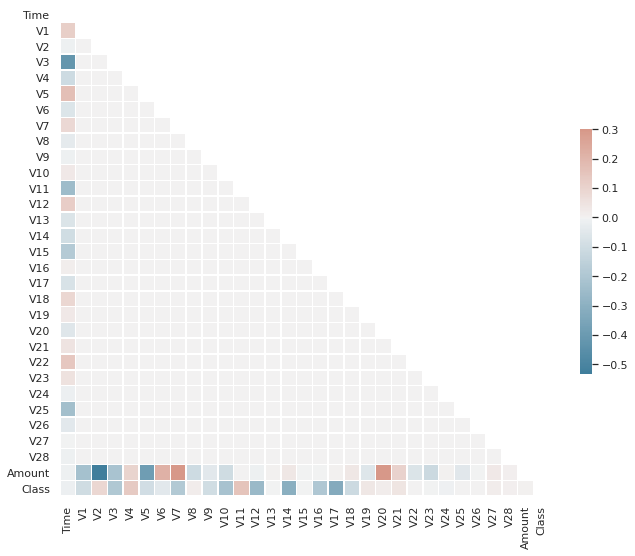

In [41]:
#Plotar matriz de correlação
sns.set_theme(style="white")
d = df
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},)

Nessa matriz de correlação, podemos ver que as variáveis V1, V2, V3... se relacionam muito pouco entre si. Isso seria mais uma evidência de que o DataSet está desbalanceado.

## Preparação dos Dados

Nesta etapa vamos focar em fazer os seguintes itens:

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados

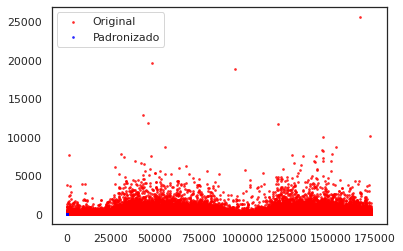

In [42]:
#Padronizar as variáveis Time e Amount
std = StandardScaler().fit_transform(df[['Time', 'Amount']]) 
#Plotar gráfico para vizualizar
fig, ax = plt.subplots()
ax.scatter('Time', 'Amount', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1], c='blue', s=3, label='Padronizado', alpha=.7)
plt.legend(loc='upper left')
plt.show()

In [43]:
#Dividir o conjunto de dados entre treino e teste

#1. Separar os dados entre feature matrix e target vector (separar em X e y)
X = df.drop("Class" , axis=1)
y = df["Class"]

#2. Dividir o DS entre treino e teste
X_train , X_test , y_train , y_test = train_test_split(X,y)

1    359
0    359
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


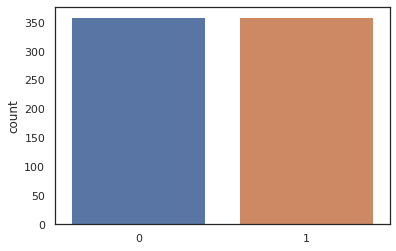

In [44]:
#Balancear o conjunto de dados

# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

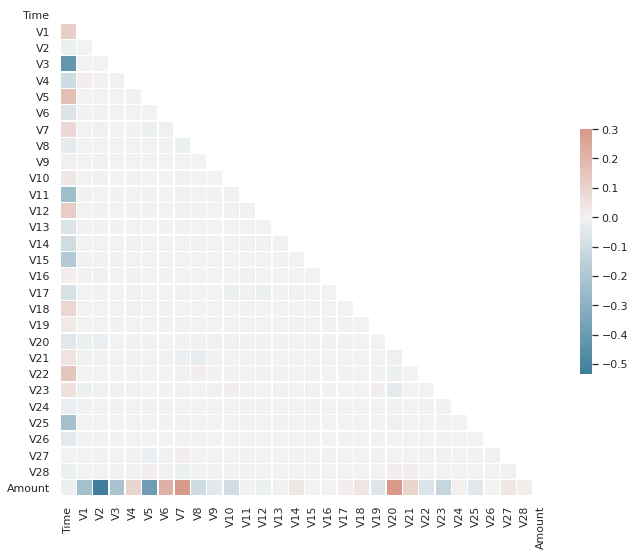

In [45]:
#Plotar nova matriz de correlação
sns.set_theme(style="white")
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230 , 20 , as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},)

Nessa preparação que fizemos nas etapas acima, conseguimos deixar as variáveis "Time" e "Amount" padronizadas numa mesma escala; Separamos nosso DS entre treino e teste; Balanceamos o conjunto de dados, pois, na análise exploratória vimos que o mesma estava extremamente desbalanceado.

## Modelo de Machine Learning

Nesta etapa vamos montar nossos modelos de Machine Learning e escolher baseado no que apresentar um melhor desempenho, vamos testar os seguintes modelos:

* Regressão Logística;
* Árvore de Decisão.

In [46]:
# 1. Modelo de regressão logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
model.fit(X_train , y_train)
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


Acurácia: 0.9992

AUC: 0.8232

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71069
           1       0.89      0.65      0.75       133

    accuracy                           1.00     71202
   macro avg       0.94      0.82      0.87     71202
weighted avg       1.00      1.00      1.00     71202



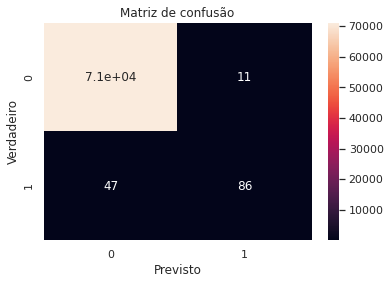

In [47]:
# Avaliar desempenho do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))
print(classification_report(y_test , y_pred))

# Plotar matriz de confusão
fig , ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , ax=ax)
ax.set_title("Matriz de confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
plt.show()


Podemos ver que neste modelo o desempenho já foi bem satisfatório.

In [48]:
# 2. Modelo de decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4, criterion="entropy")
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In Accuracy Score:
0.9994522625768939
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71069
           1       0.91      0.78      0.84       133

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



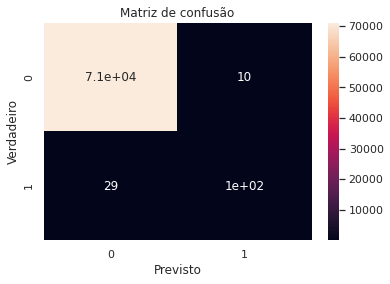

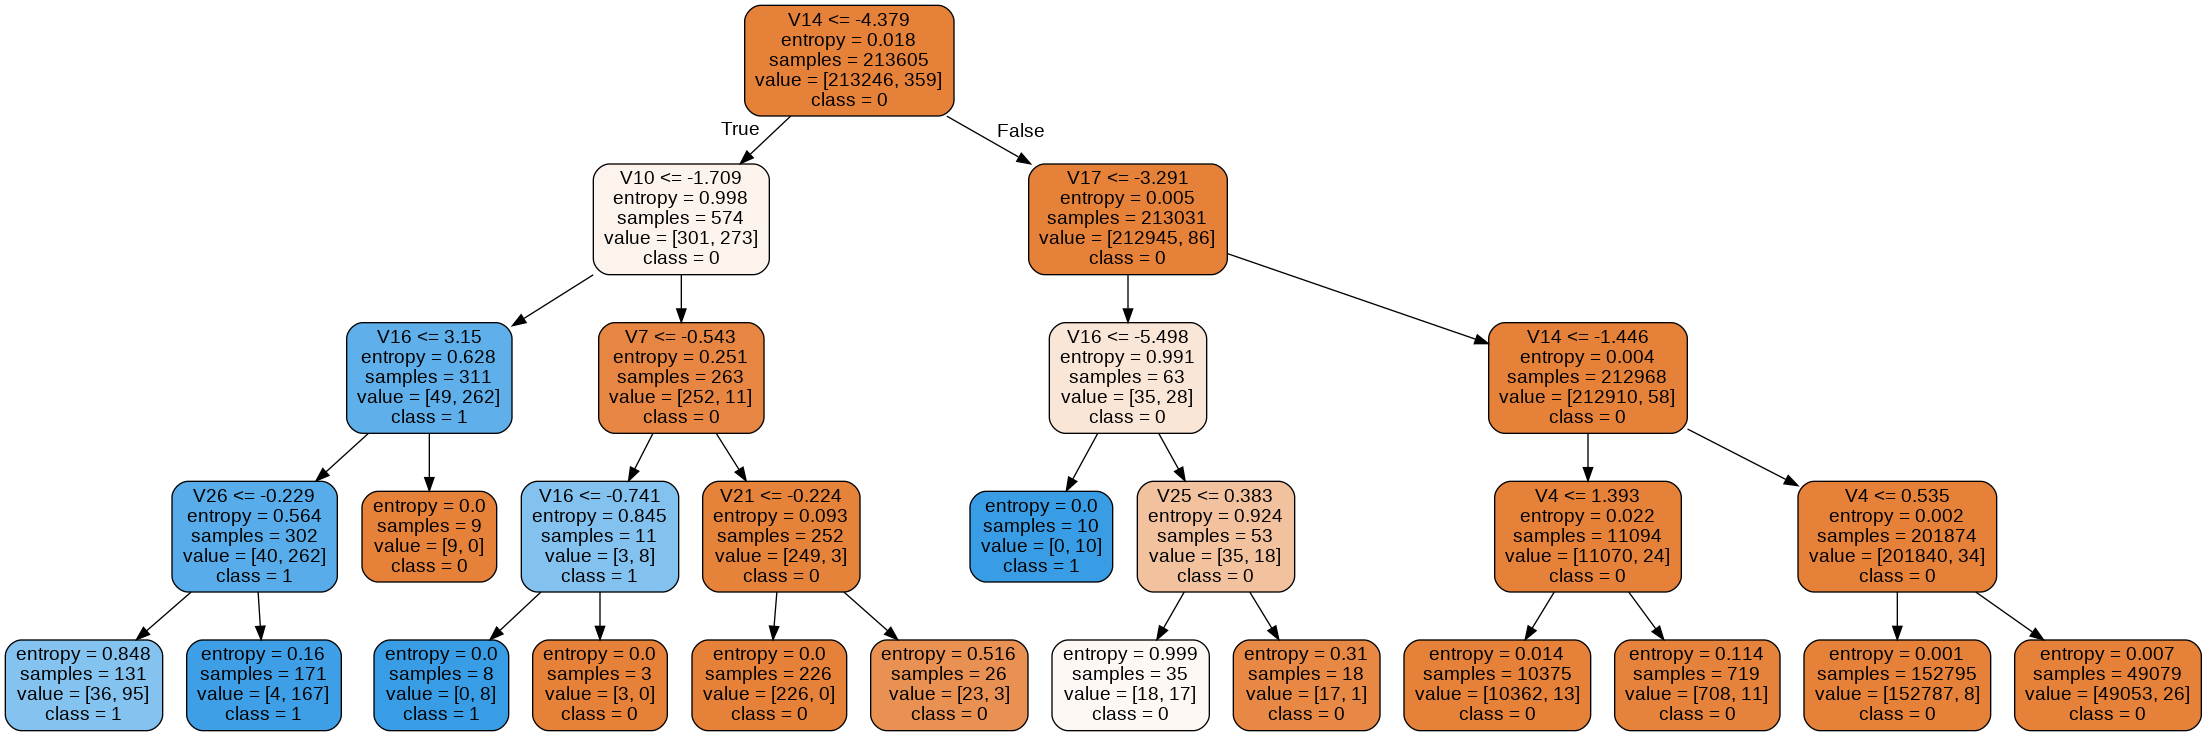

In [49]:
# Avaliar o desempenho do modelo
print("In Accuracy Score:")
print(accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred))

# Plotar matriz de confusão
fig , ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , ax=ax)
ax.set_title("Matriz de confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
plt.show()

#Visualizar como ficou nossa árvore
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot = export_graphviz(model , filled=True , rounded=True , feature_names=X.columns , class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

A decision tree, como vimos acima, apresentou um desempenho melhor que a regressão logística.

## Conclusão

Neste projeto que fizemos, utilizei dois modelos de machine learning (regressão logística, e decision tree). Vimos que os dois modelos apresentaram resultados semelhantes quanto ao desempenho.

O modelo que apresentou o melhor desempenho, foi o modelo de decision tree, porém vale ressaltar, que esse desempenho ainda deve ser avaliado por uma retenção até a validação cruzada, para realmente termos certeza de que nosso modelo está generalizado o suficiente para atender a demanda da empresa de forma eficiente. Há espaço, também, para mudarmos alguns parâmetros nos modelos para otimizar os mesmos.

De qualquer forma, esse não é um problema fácil de se resolver, há necessidade de muitas horas de trabalho, pois temos que fazer uma análise exploratória, limpar os dados, e treinar o modelo de machine learning.